In [14]:
import pandas as pd
import numpy as np
import json
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [5]:
df_curves = pd.read_csv("curves_train.csv", sep=";").merge(pd.read_csv("curves_test.csv", sep=";"), on=["openmlid", "seed"], suffixes=("_oob", "_test"))
df_curves["scores_oob"] = [json.loads(e) for e in df_curves["scores_oob"]]
df_curves["scores_test"] = [json.loads(e) for e in df_curves["scores_test"]]
df_curves

,openmlid,seed,scores_oob,scores_test
0,3,0,"[0.6934, 0.5212, 0.4277, 0.3644, 0.3214, 0.287...","[0.3238, 0.174, 0.1216, 0.0943, 0.0723, 0.0617..."
1,3,1,"[0.695, 0.5247, 0.4308, 0.3684, 0.3237, 0.287,...","[0.3389, 0.1957, 0.1282, 0.0983, 0.0748, 0.060..."
2,3,3,"[0.6683, 0.4963, 0.4072, 0.3472, 0.3078, 0.276...","[0.3163, 0.1734, 0.1132, 0.0857, 0.072, 0.0615..."
3,3,4,"[0.6733, 0.5135, 0.4262, 0.3657, 0.3225, 0.289...","[0.2976, 0.1873, 0.1279, 0.0927, 0.0721, 0.061..."
4,3,6,"[0.6742, 0.508, 0.4197, 0.354, 0.3127, 0.2794,...","[0.3101, 0.1773, 0.1241, 0.0879, 0.0685, 0.055..."
...,...,...,...,...
1938,41946,5,"[0.6582, 0.4804, 0.3951, 0.3391, 0.2995, 0.268...","[0.2882, 0.1427, 0.0983, 0.0833, 0.0657, 0.056..."
1939,41946,6,"[0.6575, 0.4841, 0.3963, 0.3412, 0.3047, 0.272...","[0.2829, 0.1446, 0.1025, 0.0816, 0.0718, 0.060..."
1940,41946,7,"[0.6653, 0.4875, 0.4018, 0.3442, 0.3058, 0.276...","[0.2998, 0.1564, 0.1086, 0.0838, 0.0721, 0.063..."
1941,41946,8,"[0.6554, 0.4844, 0.3977, 0.3394, 0.3017, 0.271...","[0.2903, 0.1502, 0.1036, 0.0816, 0.0716, 0.067..."


In [12]:
rows = []
for openmlid, df_dataset in tqdm(df_curves.groupby("openmlid")):
    min_length = min([len(e) for e in df_dataset["scores_oob"]])
    curve_stds_oob = list(np.array([e[:min_length] for e in df_dataset["scores_oob"]]).std(axis=0).round(4))
    min_length = min([len(e) for e in df_dataset["scores_test"]])
    curve_stds_test = list(np.array([e[:min_length] for e in df_dataset["scores_test"]]).std(axis=0).round(4))
    rows.append([openmlid, curve_stds_oob, curve_stds_test])
df_stds = pd.DataFrame(rows, columns=["openmlid", "stds_oob", "stds_test"])
df_stds

  0%|          | 0/206 [00:00<?, ?it/s]

,openmlid,stds_oob,stds_test
0,3,"[0.0104, 0.0095, 0.0085, 0.008, 0.0063, 0.0053...","[0.016, 0.0082, 0.0056, 0.0044, 0.0018, 0.002,..."
1,6,"[0.007, 0.005, 0.0051, 0.0049, 0.0042, 0.0041,...","[0.0085, 0.0065, 0.0058, 0.0046, 0.0043, 0.003..."
2,12,"[0.0148, 0.0126, 0.0128, 0.0105, 0.0094, 0.009...","[0.0169, 0.0187, 0.0154, 0.0125, 0.0121, 0.011..."
3,14,"[0.0179, 0.0242, 0.0217, 0.0194, 0.0181, 0.017...","[0.0244, 0.0166, 0.0126, 0.0119, 0.0126, 0.012..."
4,16,"[0.0238, 0.0214, 0.0207, 0.0178, 0.0151, 0.015...","[0.0304, 0.0264, 0.0209, 0.0137, 0.0109, 0.012..."
...,...,...,...
201,41166,"[0.0026, 0.0037, 0.0029, 0.0029, 0.0026, 0.002...","[0.0039, 0.0046, 0.0049, 0.0038, 0.003, 0.0037..."
202,41167,"[0.002, 0.0018, 0.0016, 0.0014, 0.0013, 0.0012...","[0.0013, 0.0014, 0.0013, 0.0015, 0.0013, 0.001..."
203,41168,"[0.0019, 0.0016, 0.0018, 0.0017, 0.0015, 0.001...","[0.0044, 0.0044, 0.0037, 0.0036, 0.0038, 0.003..."
204,41169,"[0.001, 0.0015, 0.0012, 0.0009, 0.0008, 0.0008...","[0.0037, 0.0032, 0.0036, 0.0032, 0.0031, 0.002..."


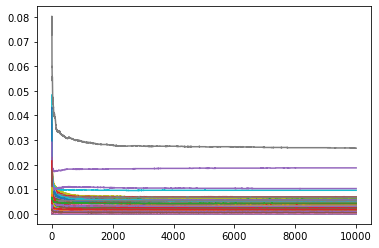

In [22]:
fig, ax = plt.subplots()
L = 10000
stds_oob = np.array([e[:L] for e in df_stds["stds_oob"] if len(e) >= L])
stds_test = np.array([e[:L] for e in df_stds["stds_test"] if len(e) >= L])
for l in stds_oob:
    ax.plot(range(L), l)
#ax.plot(range(L), np.mean(stds_oob, axis=0))
#ax.fill_between(range(L), np.min(stds_oob, axis=0), np.max(stds_oob, axis=0), alpha=0.2)
#ax.plot(range(L), np.mean(stds_test, axis=0))
#ax.fill_between(range(L), np.min(stds_test, axis=0), np.max(stds_test, axis=0), alpha=0.2)
plt.show()

In [20]:
stds_oob[:,10**4-1]

array([0.0006, 0.0007, 0.0028, 0.0045, 0.0032, 0.0042, 0.0068, 0.0002,
       0.0007, 0.0005, 0.0012, 0.0018, 0.    , 0.0004, 0.0026, 0.001 ,
       0.0011, 0.0012, 0.0004, 0.0001, 0.0015, 0.0001, 0.0009, 0.0052,
       0.0031, 0.0059, 0.0068, 0.0028, 0.0048, 0.0025, 0.005 , 0.0017,
       0.0054, 0.0005, 0.0187, 0.0052, 0.0054, 0.0006, 0.0069, 0.0012,
       0.0013, 0.0042, 0.0059, 0.0014, 0.0064, 0.004 , 0.0025, 0.0068,
       0.0018, 0.0012, 0.0012, 0.0007, 0.0023, 0.0058, 0.001 , 0.0014,
       0.0025, 0.0062, 0.0059, 0.0001, 0.0009, 0.0011, 0.0059, 0.0069,
       0.0057, 0.0052, 0.0038, 0.0048, 0.    , 0.    , 0.0006, 0.0005,
       0.0029, 0.0005, 0.0034, 0.0016, 0.0005, 0.    , 0.0014, 0.0003,
       0.0005, 0.0025, 0.002 , 0.0042, 0.    , 0.0014, 0.0041, 0.0016,
       0.003 , 0.004 , 0.0036, 0.0009, 0.0046, 0.0008, 0.0052, 0.0006,
       0.0015, 0.0068, 0.0036, 0.0053, 0.0045, 0.0011, 0.0022, 0.0029,
       0.001 , 0.0003, 0.0045, 0.0008, 0.0019, 0.0096, 0.0021, 0.0008,
      